# 데이터 분석

데이터 다운로드

https://raw.githubusercontent.com/baem1n/PublicDataAnalysis/master/data/seoul_public_bicycle/rent_merge.zip

다운로드 후 압축 해제하여 csv 파일을 ipynb 파일과 같은 위치에 추가

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# 데이터 불러오기
df = pd.read_csv('./rent_merge.csv')

c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,6,11,12,13,14,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# 데이터 프레임 상위 5개 출력
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,거치대순번,반납일시,반납대여소번호,반납대여소명,반납거치대순번,이용시간,...,대여_년,대여_월,대여_일,대여_시,대여_분,반납_년,반납_월,반납_일,반납_시,반납_분
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,...,2015,9.0,19.0,0.0,59.0,2015,9.0,19.0,2.0,39.0
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,...,2015,9.0,19.0,1.0,22.0,2015,9.0,19.0,6.0,9.0
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,...,2015,9.0,19.0,1.0,32.0,2015,9.0,19.0,6.0,9.0
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,...,2015,9.0,19.0,7.0,52.0,2015,9.0,19.0,8.0,56.0
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,...,2015,9.0,19.0,8.0,56.0,2015,9.0,19.0,9.0,5.0


In [11]:
# 데이터 프레임 컬렁 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15019907 entries, 0 to 15019906
Data columns (total 25 columns):
자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소명     object
거치대순번      int64
반납일시       object
반납대여소번호    object
반납대여소명     object
반납거치대순번    int64
이용시간       int64
이용거리       float64
대여날짜       object
대여시간       object
반납날짜       object
반납시간       object
대여_년       object
대여_월       float64
대여_일       float64
대여_시       float64
대여_분       float64
반납_년       object
반납_월       float64
반납_일       float64
반납_시       float64
반납_분       float64
dtypes: float64(9), int64(3), object(13)
memory usage: 2.8+ GB


# 데이터 프레임 가공

- 대여 정보(날짜, 시간)와 반납 정보(날짜, 시간)을 분할

In [12]:
# 데이터 프레임 컬럼 분할
df['대여날짜'] = df['대여일시'].str.split(' ', expand = True)[0]
df['대여시간'] = df['대여일시'].str.split(' ', expand = True)[1]

df['반납날짜'] = df['반납일시'].str.split(' ', expand = True)[0]
df['반납시간'] = df['반납일시'].str.split(' ', expand = True)[1]

In [14]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,거치대순번,반납일시,반납대여소번호,반납대여소명,반납거치대순번,이용시간,...,대여_년,대여_월,대여_일,대여_시,대여_분,반납_년,반납_월,반납_일,반납_시,반납_분
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,...,2015,9.0,19.0,0.0,59.0,2015,9.0,19.0,2.0,39.0
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,...,2015,9.0,19.0,1.0,22.0,2015,9.0,19.0,6.0,9.0
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,...,2015,9.0,19.0,1.0,32.0,2015,9.0,19.0,6.0,9.0
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,...,2015,9.0,19.0,7.0,52.0,2015,9.0,19.0,8.0,56.0
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,...,2015,9.0,19.0,8.0,56.0,2015,9.0,19.0,9.0,5.0


In [15]:
df['대여_년'] = df['대여날짜'].str.split('-', expand = True)[0]
df['대여_월'] = df['대여날짜'].str.split('-', expand = True)[1]
df['대여_일'] = df['대여날짜'].str.split('-', expand = True)[2]

df['대여_시'] = df['대여시간'].str.split(':', expand = True)[0]
df['대여_분'] = df['대여시간'].str.split(':', expand = True)[1]

In [16]:
df['반납_년'] = df['반납날짜'].str.split('-', expand = True)[0]
df['반납_월'] = df['반납날짜'].str.split('-', expand = True)[1]
df['반납_일'] = df['반납날짜'].str.split('-', expand = True)[2]

df['반납_시'] = df['반납시간'].str.split(':', expand = True)[0]
df['반납_분'] = df['반납시간'].str.split(':', expand = True)[1]

In [17]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,거치대순번,반납일시,반납대여소번호,반납대여소명,반납거치대순번,이용시간,...,대여_년,대여_월,대여_일,대여_시,대여_분,반납_년,반납_월,반납_일,반납_시,반납_분
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,...,2015,09,19,0,59,2015,09,19,2,39
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,...,2015,09,19,1,22,2015,09,19,6,09
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,...,2015,09,19,1,32,2015,09,19,6,09
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,...,2015,09,19,7,52,2015,09,19,8,56
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,...,2015,09,19,8,56,2015,09,19,9,05


# 기초 분석

In [23]:
df_day_count = df.groupby('대여_월')['대여_월'].size()
df_day_year = df.groupby('대여_년')['대여_년'].size()

In [24]:
df_day_count

대여_월
01     738990
02     737788
03     693041
04     396036
05    1492215
06    1789950
07    1596580
08    1761647
09    2635297
10     709081
11    1643747
12     825535
Name: 대여_월, dtype: int64

In [25]:
# 대여_년에 불필요한 인덱스(')를 제거
df_day_year

대여_년
'2017    3768720
'2018    2889343
2015      107858
2016     1580480
2017      354731
2018     5372292
2019      946483
Name: 대여_년, dtype: int64

In [26]:
df_day_year.index

Index([''2017', ''2018', '2015', '2016', '2017', '2018', '2019'], dtype='object', name='대여_년')

In [27]:
df['대여_년'] = df['대여_년'].str.replace("'","")

In [28]:
df_day_year = df.groupby('대여_년').size()

In [29]:
df_day_year

대여_년
2015     107858
2016    1580480
2017    4123451
2018    8261635
2019     946483
dtype: int64

In [30]:
df_day_year.diff()

대여_년
2015          NaN
2016    1472622.0
2017    2542971.0
2018    4138184.0
2019   -7315152.0
dtype: float64

# 데이터 시각화

In [31]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

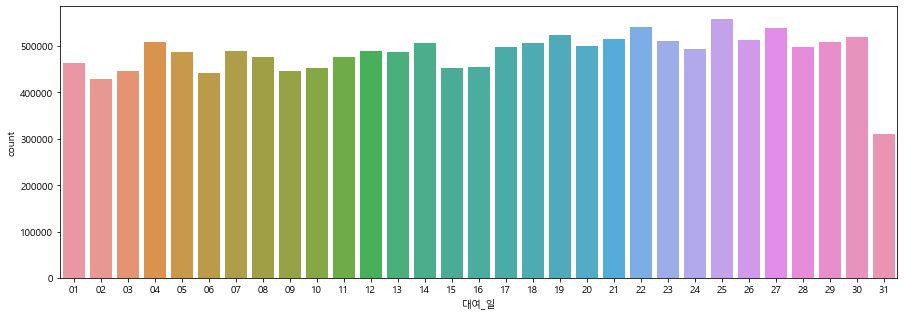

In [32]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여_일")

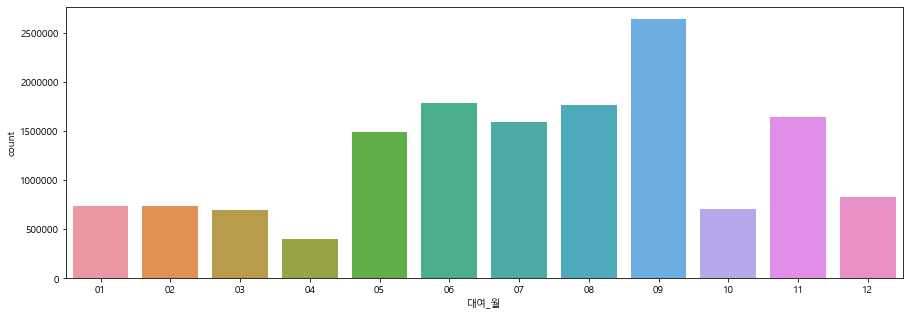

In [33]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여_월")

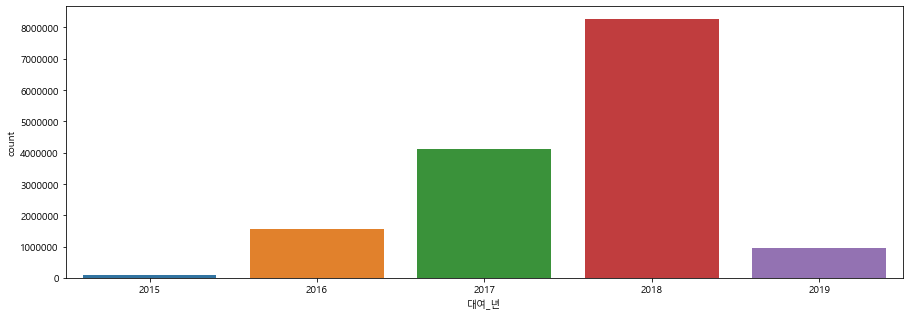

In [34]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여_년")

# 특정 대여소를 타겟으로 분석

In [35]:
#등록된 대여소명(대여, 반납) 분석
#대여는 4812곳, 반납은 4822곳에서 발생
len(df['대여대여소명'].unique()), len(df['반납대여소명'].unique())

(4812, 4822)

In [36]:
# 가장 많이 대여된 대여소명 확인
df.groupby('대여대여소명')['대여대여소명'].size()

대여대여소명
 (구)합정동 주민센터       3975
 CJ 드림시티           4055
 CJ제일제당 앞          3015
 DMC빌 앞            4856
 DMC산학협력연구센터 앞    10619
                  ...  
휘봉고등학교 앞           1377
흑석역 1번출구           8272
흑석역 4번출구           1862
흑석한강푸르지오 106동앞     1026
희성오피앙              1388
Name: 대여대여소명, Length: 4812, dtype: int64

In [37]:
# 가장 많이 반납된 대여된 대여소명 확인
df.groupby('반납대여소명')['반납대여소명'].size()

반납대여소명
 (구)합정동 주민센터       4601
 CJ 드림시티           5118
 CJ제일제당 앞          2750
 DMC빌 앞            5629
 DMC산학협력연구센터 앞    10659
                  ...  
휘봉고등학교 앞           1314
흑석역 1번출구           9332
흑석역 4번출구           1623
흑석한강푸르지오 106동앞      702
희성오피앙              1458
Name: 반납대여소명, Length: 4822, dtype: int64

In [43]:
df2 = df[df['대여대여소명']=='(구)합정동 주민센터']
df2.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,거치대순번,반납일시,반납대여소번호,반납대여소명,반납거치대순번,이용시간,...,대여_년,대여_월,대여_일,대여_시,대여_분,반납_년,반납_월,반납_일,반납_시,반납_분
8703806,SPB-19357,2018-12-01 02:34:20,101,(구)합정동 주민센터,2,2018-12-01 02:57:59,164,북가좌1동 주민센터,8,22,...,2018,12,01,02,34,2018,12,01,02,57
8704466,SPB-15698,2018-12-01 03:42:29,101,(구)합정동 주민센터,1,2018-12-01 04:00:26,109,제일빌딩 앞,5,17,...,2018,12,01,03,42,2018,12,01,04,00
8707047,SPB-13723,2018-12-01 09:57:48,101,(구)합정동 주민센터,1,2018-12-01 10:05:14,104,합정역 1번출구 앞,11,7,...,2018,12,01,09,57,2018,12,01,10,05
8707661,SPB-06107,2018-12-01 10:29:46,101,(구)합정동 주민센터,5,2018-12-01 10:49:20,130,신촌역(2호선) 7번출구 앞,2,19,...,2018,12,01,10,29,2018,12,01,10,49
8708630,SPB-14795,2018-12-01 11:38:51,101,(구)합정동 주민센터,1,2018-12-01 11:49:13,152,마포구민체육센터 앞,1,10,...,2018,12,01,11,38,2018,12,01,11,49


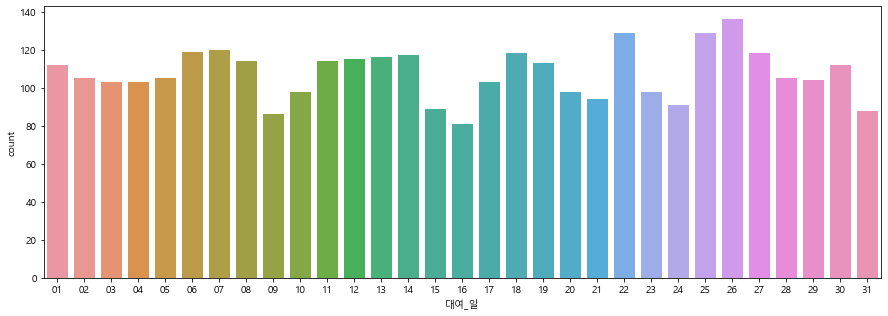

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df2, x="대여_일")

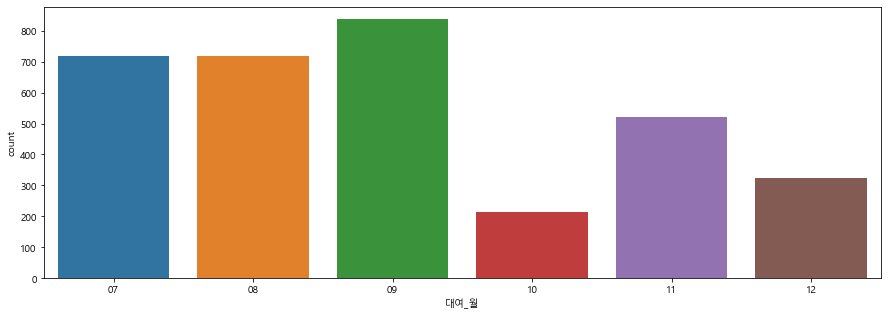

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df2, x="대여_월")

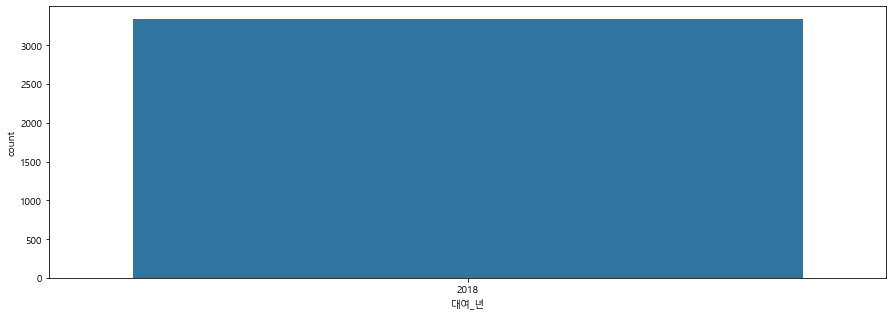

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df2, x="대여_년")

In [48]:
df2.groupby('자전거번호')['이용시간'].sum()

자전거번호
SPB-00018    114
SPB-00044      5
SPB-00062     59
SPB-00068      9
SPB-00122      6
            ... 
SPB-19997     31
SPB-20001     19
SPB-20002      8
SPB-20007      5
SPB-20014     21
Name: 이용시간, Length: 2445, dtype: int64

In [53]:
df2.groupby(['반납대여소명'])['이용시간'].sum()

반납대여소명
(구)합정동 주민센터       20381
CJ 드림시티             174
DMC산학협력연구센터 앞        34
DMC역 2번출구 옆          31
DMC역 9번출구 앞          99
                  ...  
홍은사거리               168
황금내근린공원             303
효창공원앞역 3번출구 뒤        76
흑석역 1번출구             53
흑석한강푸르지오 106동앞      187
Name: 이용시간, Length: 203, dtype: int64

In [52]:
df2.groupby(['자전거번호', '반납대여소명'])['이용시간'].sum()

자전거번호      반납대여소명       
SPB-00018  (구)합정동 주민센터      35
           망원2빗물펌프장 앞       64
           망원역 1번출구 앞       15
SPB-00044  합정역 7번출구 앞        5
SPB-00062  (구)합정동 주민센터      44
                            ..
SPB-19997  새절역 2번출구         31
SPB-20001  서강대 정문 건너편       19
SPB-20002  제일빌딩 앞            8
SPB-20007  합정역 1번출구 앞        5
SPB-20014  국회의사당역 5번출구 옆    21
Name: 이용시간, Length: 3226, dtype: int64

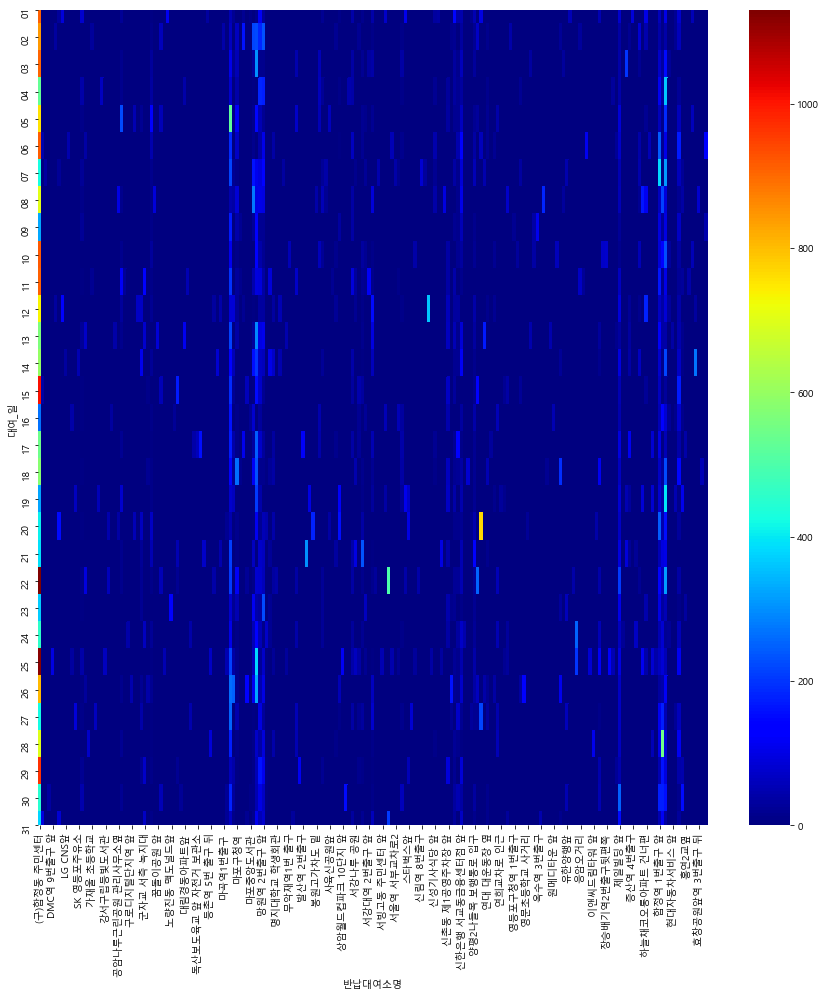

In [78]:
df2_temp = df2.pivot_table(values='이용시간',index='대여_일',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(df2_temp, cmap='jet')

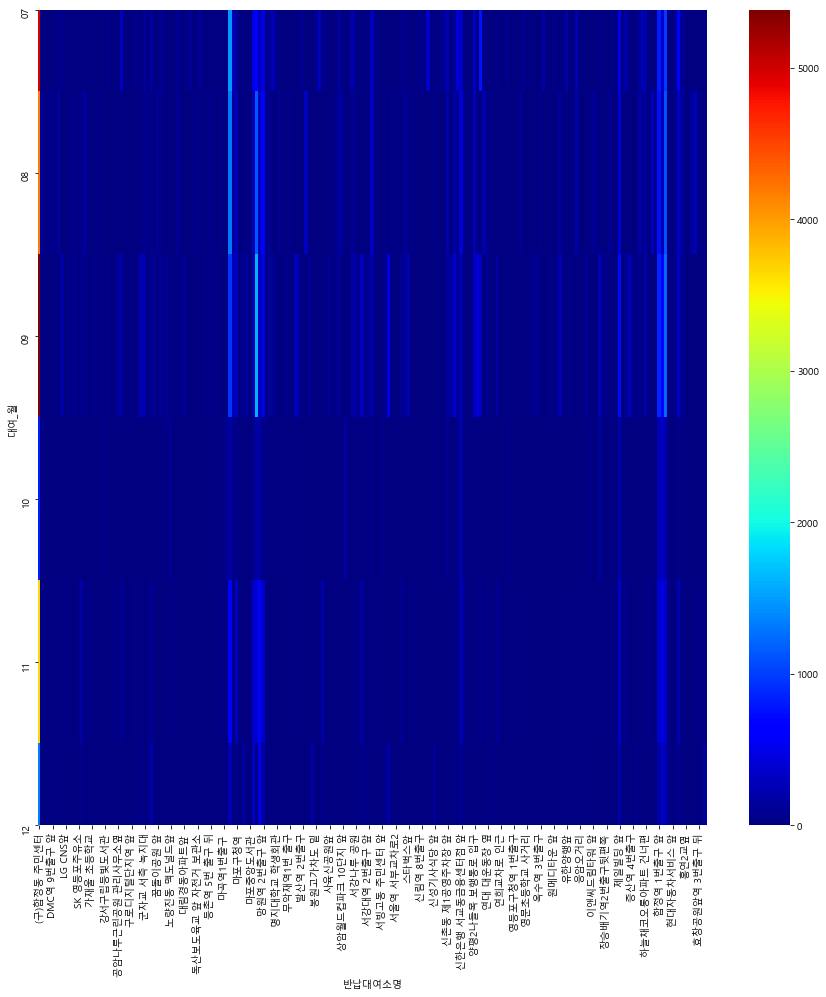

In [79]:
df2_temp = df2.pivot_table(values='이용시간',index='대여_월',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(df2_temp, cmap='jet')

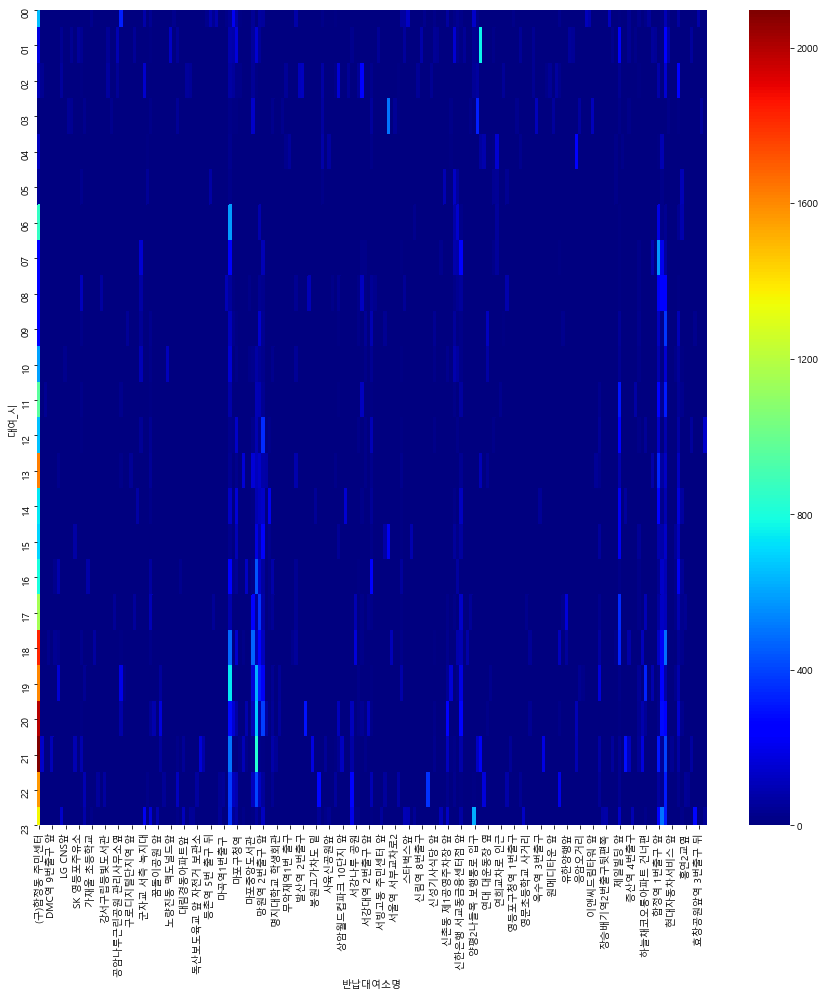

In [81]:
df2_temp = df2.pivot_table(values='이용시간',index='대여_시',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(df2_temp, cmap='jet')

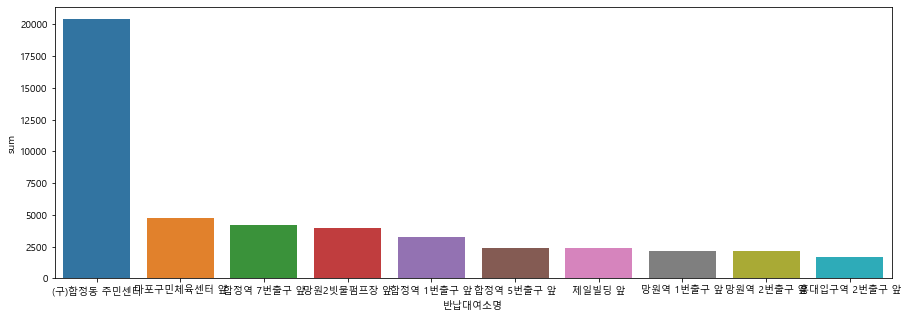

In [71]:
df2_temp = df2.groupby(['반납대여소명'])['이용시간'].agg(['sum']).sort_values('sum', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=df2_temp.index, y=df2_temp['sum'])

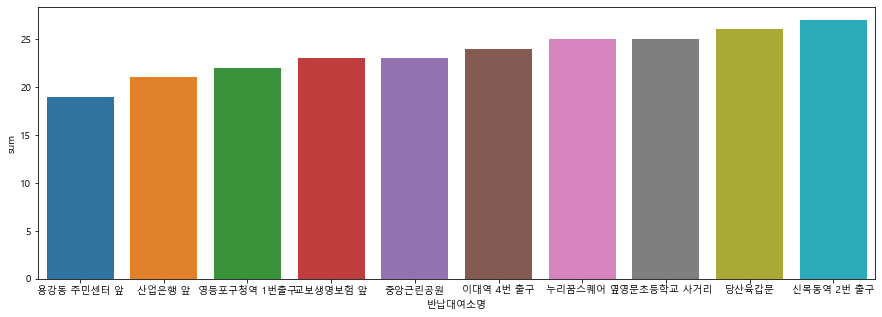

In [72]:
df2_temp = df2.groupby(['반납대여소명'])['이용시간'].agg(['sum']).sort_values('sum').head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=df2_temp.index, y=df2_temp['sum'])

# 특정 자전거를 타겟으로 분석

In [82]:
# 자전거 번호별 이용시간 분석
# 이를 통해 사용 시간이 오래된 자전거의 사용 패턴을 확인
df['자전거번호'] = df['자전거번호'].str.replace("'","")
df_bicycle = df.groupby('자전거번호')['이용시간'].sum()

In [83]:
df_bicycle.sort_values(ascending=False).head(10)

자전거번호
SPB-00367    54199
SPB-03162    52976
SPB-00582    52942
SPB-01135    52409
SPB-01257    52314
SPB-00138    51097
SPB-00556    50592
SPB-04489    50433
SPB-00183    50361
SPB-00255    50143
Name: 이용시간, dtype: int64

In [84]:
SPB00367 = df[df['자전거번호']=='SPB-00367']

In [85]:
# 자전거(SPB00367)의 대여소 확인
len(SPB00367['대여대여소명'].unique()), len(SPB00367['반납대여소명'].unique())

(1002, 1004)

In [91]:
# 자전거(SPB00367)의 대여소별 건수 확인
pd.value_counts(SPB00367['대여대여소명'])

 누리꿈스퀘어 옆        19
 홈플러스 앞          16
 서강대 후문 옆        14
 DMC역 9번출구 앞     14
 여의나루역 1번출구 앞    13
                 ..
 옥수역 3번출구         1
 동성중학교 앞          1
서강나루 공원           1
609. 제기2교         1
국회의사당역 5번출구 옆     1
Name: 대여대여소명, Length: 1002, dtype: int64

In [90]:
pd.value_counts(SPB00367['반납대여소명'])

 누리꿈스퀘어 옆            19
 홈플러스 앞              16
 홍대입구역 2번출구 앞        15
 서강대 후문 옆            13
 여의나루역 1번출구 앞        13
                     ..
광화문역 2번출구 앞           1
가재울 초등학교              1
' 용마문화복지센터'           1
' 자양사거리 광진아크로텔 앞'     1
국회의사당역 5번출구 옆         1
Name: 반납대여소명, Length: 1004, dtype: int64

In [92]:
# 가장 많이 대여된 대여소명 확인
SPB00367.groupby('대여대여소명')['대여대여소명'].size()

대여대여소명
 (구)합정동 주민센터      5
 CJ 드림시티          3
 DMC빌 앞           2
 DMC산학협력연구센터 앞    8
 DMC역 2번출구 옆      7
                 ..
화광신문사 앞           1
화랑대역 2번출구 앞       1
휘경공고앞             2
휘봉고등학교 앞          3
흑석한강푸르지오 106동앞    1
Name: 대여대여소명, Length: 1002, dtype: int64

In [93]:
# 가장 많이 반납된 대여소명 확인
SPB00367.groupby('반납대여소명')['반납대여소명'].size()

반납대여소명
 (구)합정동 주민센터      4
 CJ 드림시티          3
 DMC빌 앞           2
 DMC산학협력연구센터 앞    7
 DMC역 2번출구 옆      7
                 ..
홍익병원앞 교차로         2
화광신문사 앞           1
화랑대역 2번출구 앞       1
휘경공고앞             2
휘봉고등학교 앞          3
Name: 반납대여소명, Length: 1004, dtype: int64

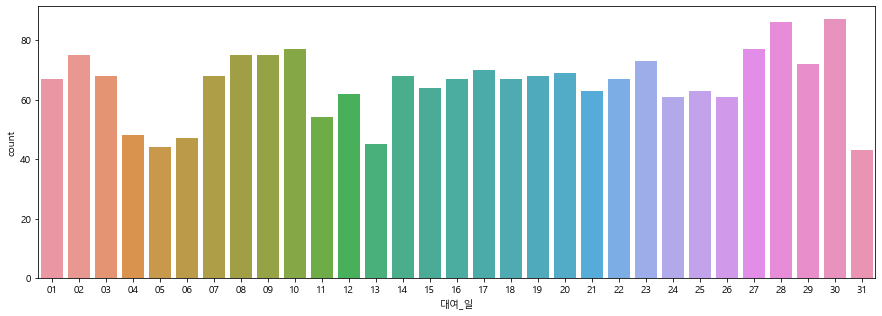

In [94]:
plt.figure(figsize=(15, 5))
sns.countplot(data=SPB00367, x="대여_일")

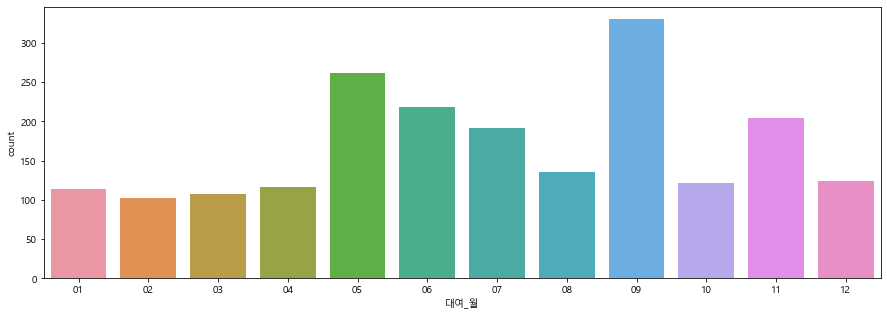

In [96]:
plt.figure(figsize=(15, 5))
sns.countplot(data=SPB00367, x="대여_월")

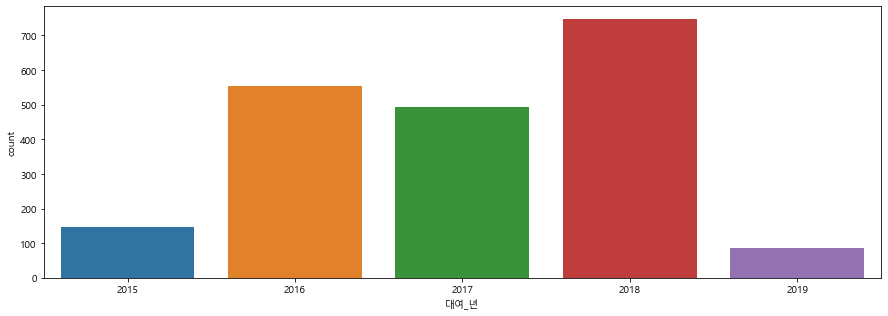

In [95]:
plt.figure(figsize=(15, 5))
sns.countplot(data=SPB00367, x="대여_년")

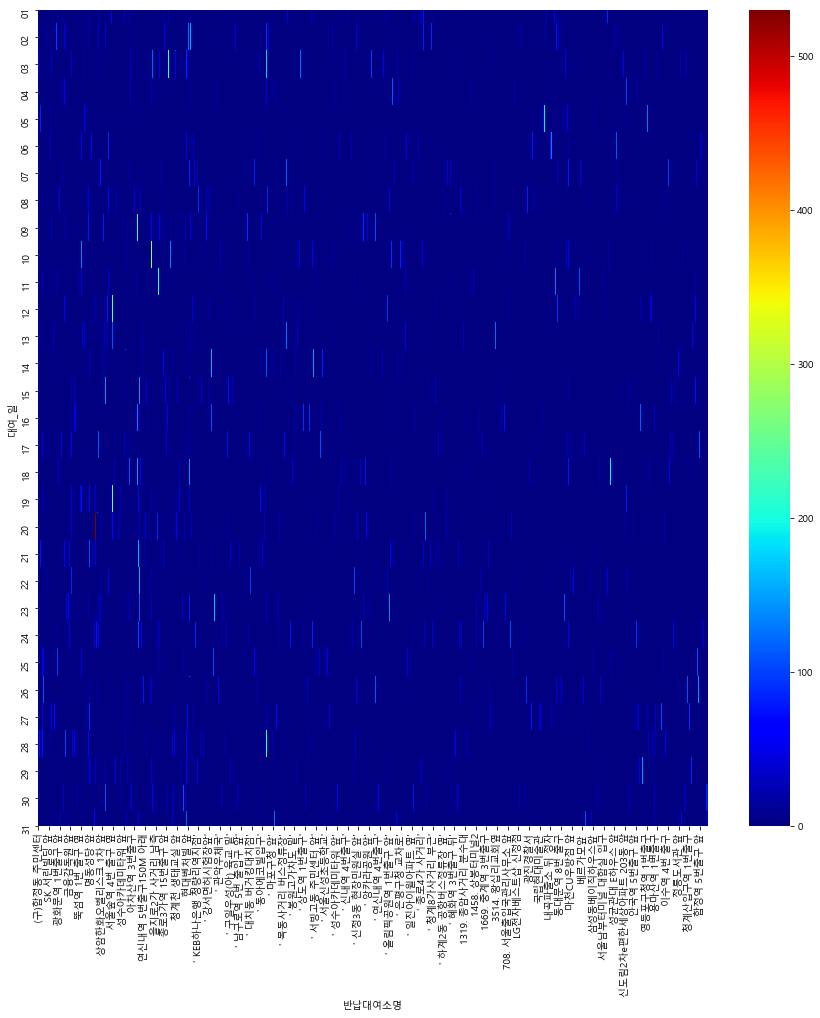

In [98]:
SPB00367_temp = SPB00367.pivot_table(values='이용시간',index='대여_일',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(SPB00367_temp, cmap='jet')

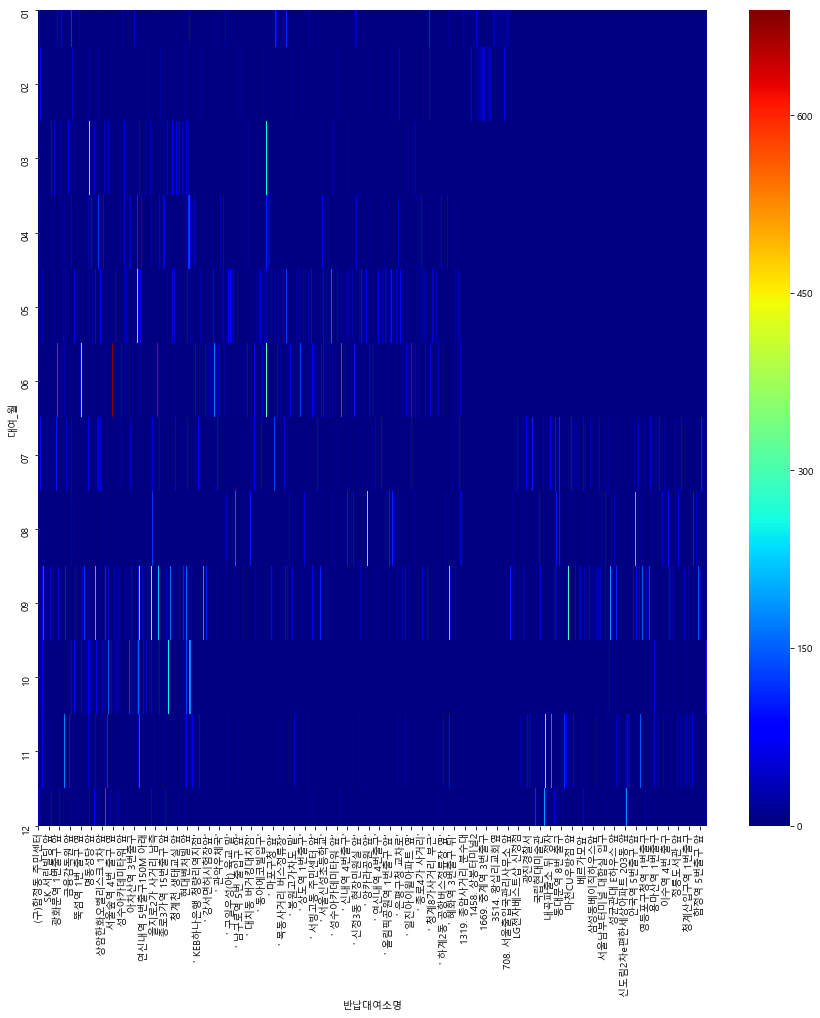

In [99]:
SPB00367_temp = SPB00367.pivot_table(values='이용시간',index='대여_월',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(SPB00367_temp, cmap='jet')

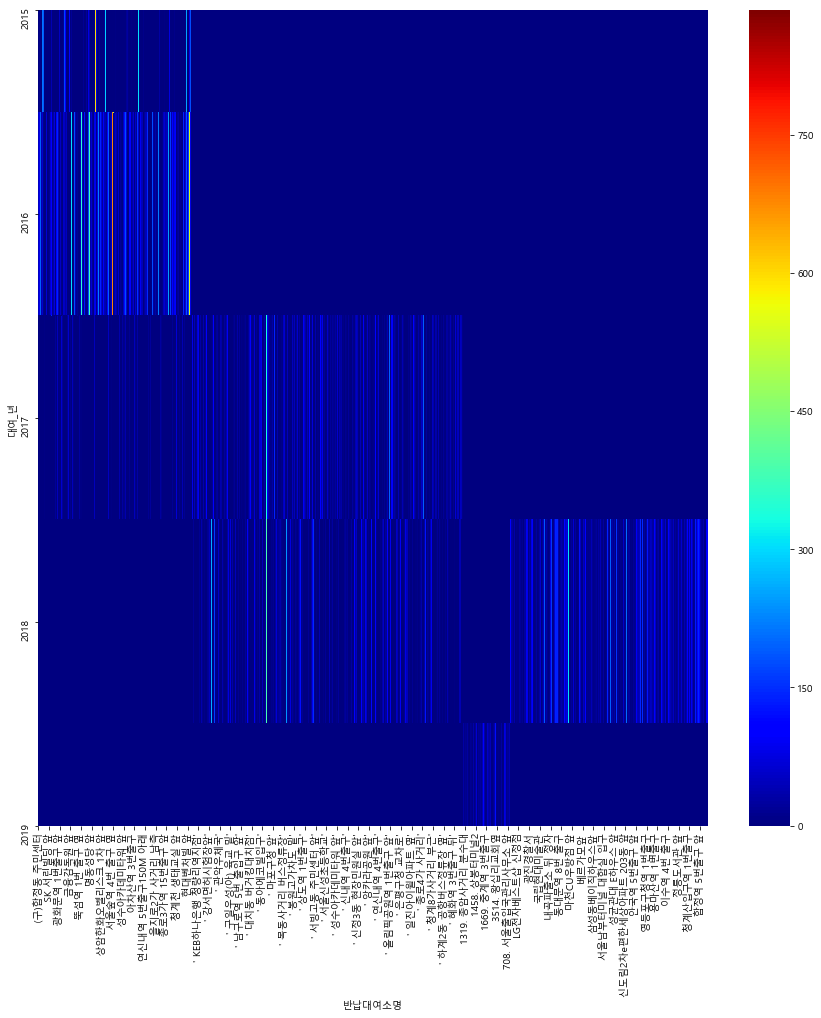

In [100]:
SPB00367_temp = SPB00367.pivot_table(values='이용시간',index='대여_년',columns='반납대여소명',fill_value=0, aggfunc='sum')
plt.figure(figsize=(15, 15))
sns.heatmap(SPB00367_temp, cmap='jet')

# 대여소 위치 시각화

In [118]:
station = pd.read_excel('./data/seoul_public_bicycle/station/공공자전거 대여소 정보_201905.xlsx')
station.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.549561,126.905754,5
1,마포구,102,102. 망원역 1번출구 앞,37.556000,126.910454,20
2,마포구,103,103. 망원역 2번출구 앞,37.554951,126.910835,14
3,마포구,104,104. 합정역 1번출구 앞,37.550629,126.914986,13
4,마포구,105,105. 합정역 5번출구 앞,37.550007,126.914825,5


In [130]:
import folium

# 자전거 거치대의 평균값을 지도의 중심값으로설정
m = folium.Map(location=[station['위도'].mean(), station['경도'].mean()], zoom_strat=12)

for n in station.index:
    folium.Circle(
        location=[station.loc[n, '위도'], station.loc[n, '경도']],
        popup=station.loc[n, '대여소명'],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)
m

In [146]:
s1 = station.groupby('구분')['대여소명'].agg(['count']).sort_values(by='count',ascending=False)
s1

,count
구분,
강남구,100
송파구,99
영등포구,89
서초구,87
강서구,86
마포구,78
노원구,67
종로구,64
성동구,63


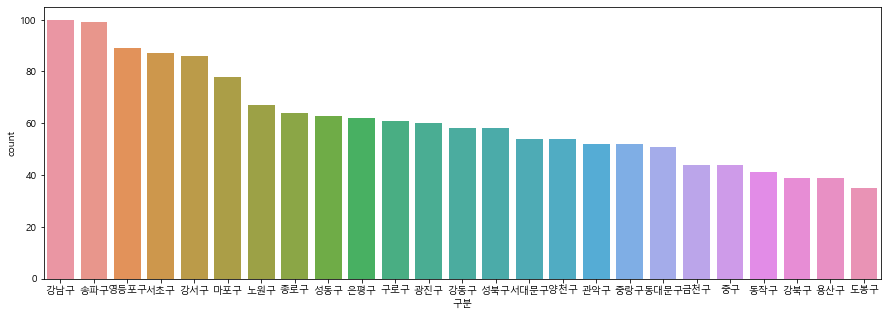

In [148]:
plt.figure(figsize=(15, 5))
sns.barplot(x=s1.index, y=s1['count'])

In [149]:
s2 = station.groupby('구분')['거치대수'].agg(['sum']).sort_values('sum', ascending=False)
s2.head()

,sum
구분,
송파구,1279
영등포구,1258
서초구,1214
강남구,1210
마포구,1062


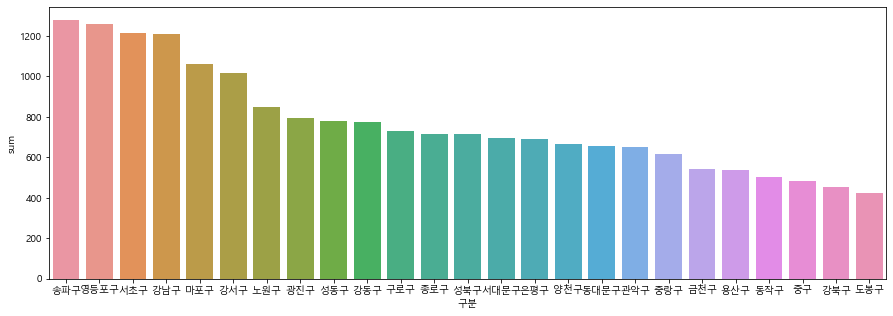

In [150]:
plt.figure(figsize=(15, 5))
sns.barplot(x=s2.index, y=s2['sum'])

# 이용량 예측을 위한 데이터 가공

In [151]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,거치대순번,반납일시,반납대여소번호,반납대여소명,반납거치대순번,이용시간,...,대여_년,대여_월,대여_일,대여_시,대여_분,반납_년,반납_월,반납_일,반납_시,반납_분
0,SPB-00186,2015-09-19 0:59,115,사루비아 빌딩 앞,5,2015-09-19 2:39,115,사루비아 빌딩 앞,5,98,...,2015,09,19,0,59,2015,09,19,2,39
1,SPB-00403,2015-09-19 1:22,112,극동방송국 앞,3,2015-09-19 6:09,102,망원역 1번출구 앞,16,286,...,2015,09,19,1,22,2015,09,19,6,09
2,SPB-00485,2015-09-19 1:32,112,극동방송국 앞,1,2015-09-19 6:09,102,망원역 1번출구 앞,15,276,...,2015,09,19,1,32,2015,09,19,6,09
3,SPB-00292,2015-09-19 7:52,221,여의도초교 앞,2,2015-09-19 8:56,221,여의도초교 앞,1,63,...,2015,09,19,7,52,2015,09,19,8,56
4,SPB-00270,2015-09-19 8:56,221,여의도초교 앞,3,2015-09-19 9:05,210,IFC몰,2,8,...,2015,09,19,8,56,2015,09,19,9,05


In [152]:
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '거치대순번', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대순번', '이용시간', '이용거리', '대여날짜', '대여시간', '반납날짜', '반납시간',
       '대여_년', '대여_월', '대여_일', '대여_시', '대여_분', '반납_년', '반납_월', '반납_일', '반납_시',
       '반납_분'],
      dtype='object')

In [156]:
df_rent = df.groupby(by=['대여날짜','대여_년','대여_월','대여_일','대여_시'])['대여일시'].count()
df_rent.head()

대여날짜         대여_년  대여_월  대여_일  대여_시
'2017-04-01  2017  04    01    00      177
                               01      154
                               02      121
                               03       74
                               04       54
Name: 대여일시, dtype: int64

In [157]:
df_rent = pd.DataFrame(df_rent).reset_index()
df_rent.head()

,대여날짜,대여_년,대여_월,대여_일,대여_시,대여일시
0,'2017-04-01,2017,04,01,00,177
1,'2017-04-01,2017,04,01,01,154
2,'2017-04-01,2017,04,01,02,121
3,'2017-04-01,2017,04,01,03,74
4,'2017-04-01,2017,04,01,04,54


In [159]:
df_rent.columns = ['대여날짜','대여년','대여월','대여일','대여시','대여량']
df_rent.head()

,대여날짜,대여년,대여월,대여일,대여시,대여량
0,'2017-04-01,2017,04,01,00,177
1,'2017-04-01,2017,04,01,01,154
2,'2017-04-01,2017,04,01,02,121
3,'2017-04-01,2017,04,01,03,74
4,'2017-04-01,2017,04,01,04,54


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C27E76048>]],
      dtype=object)

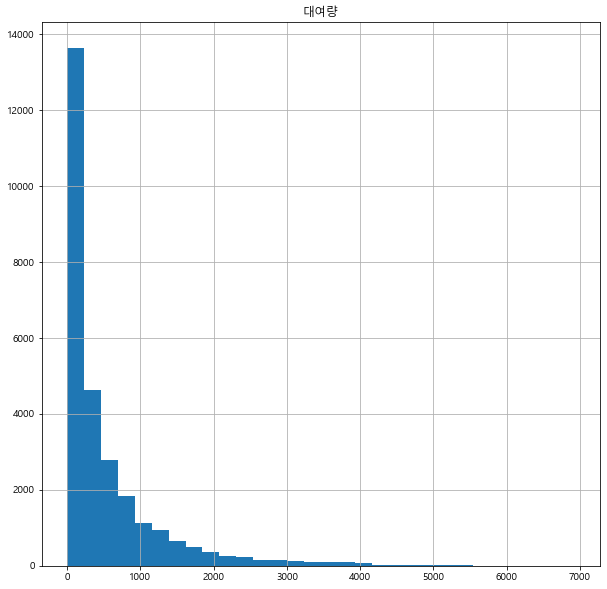

In [163]:
df_rent.hist(figsize=(10,10), bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C232FD148>]],
      dtype=object)

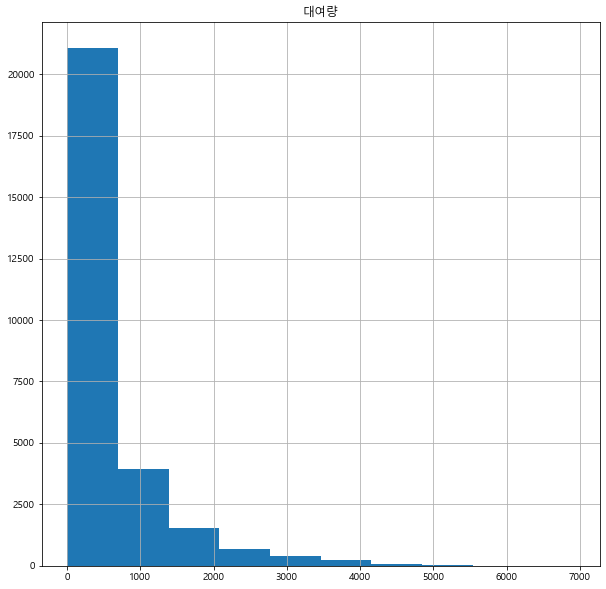

In [162]:
df_rent.hist(figsize=(10,10), bins=10)

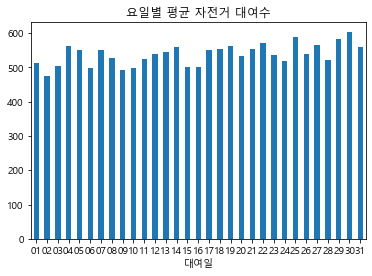

In [166]:
df_rent.groupby('대여일')['대여량'].mean().plot.bar(title="요일별 평균 자전거 대여수", rot=0)

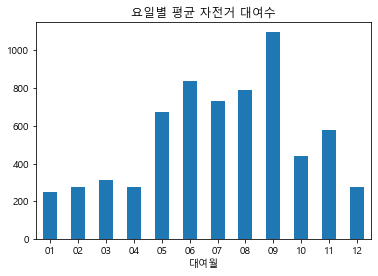

In [167]:
df_rent.groupby('대여월')['대여량'].mean().plot.bar(title="요일별 평균 자전거 대여수", rot=0)

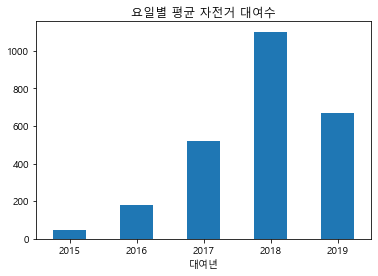

In [168]:
df_rent.groupby('대여년')['대여량'].mean().plot.bar(title="요일별 평균 자전거 대여수", rot=0)

In [170]:
df_rent.to_csv('./seoul_public_bicycle_rent.csv')